#### About

> Attention mechanism

Attention is a mechanism used in neural networks to selectively focus on different parts of the input data, allowing the model to learn to weigh the importance of different elements of the input when making predictions or generating output. Attention mechanisms have been widely used in natural language processing (NLP) tasks such as machine translation, sentiment analysis, and text summarization. Mathematically, the mechanism of attention can be described as follows:

1. Input Embedding: The input data (such as a sequence of words in NLP) is first embedded into a continuous vector representation using an embedding layer. It converts discrete input data into a continuous representation that can be processed by a neural network.

2. Query, key, and value: The embedded input data is then used to generate three sets of vectors—query, key, and value. These vectors are linear transformations of the input embeddings, which are typically computed using a learnable weight matrix. The query vector represents the information the model wants to retrieve or focus on, the key vector represents the information in the input data, and the value vector represents the actual value or representation of the input data.

3. Attention Weights: The next step is to calculate attention weights, which determine how much attention or importance each input data element should have. Note that the weights are calculated by measuring the similarity between the query vectors and the key vectors. Common methods of measuring similarity include dot product, cosine similarity, or scaled dot product.

4. Softmax activation: The attention weights are then passed through a softmax activation function, which normalizes the weights to be between 0 and 1 and ensures that the weights sum to 1. This softmax activation allows the model to allocate attention among the input elements in a probabilistic manner. , giving more weight to more relevant elements and less weight to less relevant elements. 

5. Weighted Sum: Attention weights are used to calculate a weighted sum of value vectors, where values ​​with higher attention weights contribute more to the final representation. This weighted sum represents the context or participation representation of the input data, which is a weighted combination of input values ​​based on their importance.

6. Output: The participant representations or context vectors are then used as input to subsequent neural network layers for further processing or prediction. The attention mechanism allows the model to selectively focus on different parts of the input data according to the relevance of the input data, which improves the model's ability to capture important information and make accurate predictions. 

Attention mechanisms can be implemented in different ways, such as self-attention or scaled dot-product attention, often used in models based on transformers, or additive attention or multiplicative attention, which are early versions of attention mechanisms.

In [1]:
from keras.layers import Dense, Embedding, Input, Lambda, Dot
from keras.models import Model
import keras.backend as K


2023-04-22 03:48:26.562959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 03:48:26.639914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-22 03:48:26.640484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 03:48:28.243138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Input data dimensions
batch_size = 4
sequence_length = 6
embedding_dim = 4
vector_dim = 3


In [3]:
# Input layer
input_data = Input(shape=(sequence_length, embedding_dim))


In [4]:
# Query, Key, and Value vectors
query = Dense(vector_dim)(input_data)
key = Dense(vector_dim)(input_data)
value = Dense(vector_dim)(input_data)


2023-04-22 03:48:40.219312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-22 03:48:40.220673: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:
# Compute similarity scores (dot product)
similarity_scores = Dot(axes=(2,2))([query, key])
print(similarity_scores)

KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6), dtype=tf.float32, name=None), name='dot/MatMul:0', description="created by layer 'dot'")


In [6]:
# Softmax activation for attention weights
attention_weights = Dense(sequence_length, activation='softmax')(similarity_scores)


In [7]:
# Compute weighted sum of value vectors
weighted_sum = Dot(axes=(2,1))([attention_weights, value])


In [8]:
# Flatten the weighted sum tensor
context_vector = Lambda(lambda x: K.sum(x, axis=1))(weighted_sum)


In [9]:
# Output layer
output = Dense(1, activation='sigmoid')(context_vector)


In [10]:
# Define the model
model = Model(inputs=input_data, outputs=output)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
# Print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 4)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 6, 3)         15          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 6, 3)         15          ['input_1[0][0]']                
                                                                                                  
 dot (Dot)                      (None, 6, 6)         0           ['dense[0][0]',                  
                                                                  'dense_1[0][0]']            

In [13]:
import numpy as np

# Generate some example data
X_train = np.random.rand(100, 6, 4)  # Input data with shape (batch_size, sequence_length, embedding_dim)
y_train = np.random.randint(0, 2, size=(100, 1))  # Binary labels


In [14]:
# Fit the model and train
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 2s 23ms/step - loss: 2.8294 - accuracy: 0.5625 - val_loss: 4.8917 - val_accuracy: 0.2500
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 2.5314 - accuracy: 0.5625 - val_loss: 4.4302 - val_accuracy: 0.2500
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 2.2539 - accuracy: 0.5625 - val_loss: 3.9339 - val_accuracy: 0.2500
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 1.9839 - accuracy: 0.5625 - val_loss: 3.4477 - val_accuracy: 0.2500
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 1.7132 - accuracy: 0.5625 - val_loss: 2.9993 - val_accuracy: 0.2500
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 1.4534 - accuracy: 0.5625 - val_loss: 2.5811 - val_accuracy: 0.2500
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 1.2372 - accuracy: 0.5625 - val_loss: 2.1347 - val_accuracy: 0.3000
Epoch 8/10
20/20 [=

In [15]:
import matplotlib.pyplot as plt

# Generate some example test data
X_test = np.random.rand(20, 6, 4)  # Input data with shape (batch_size, sequence_length, embedding_dim)


In [16]:
# Make predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 395ms/step


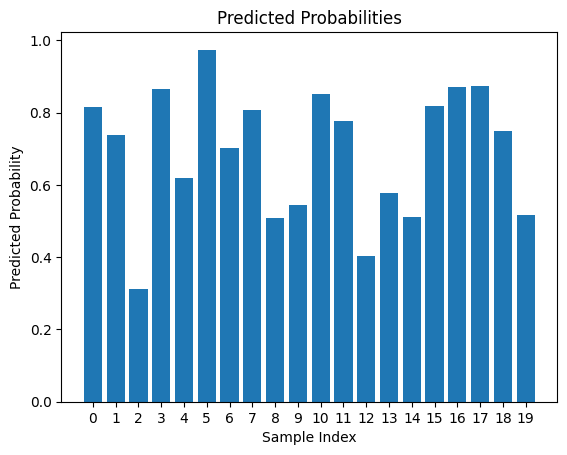

In [18]:

# Plot predicted probabilities
plt.bar(np.arange(len(y_pred)), y_pred[:, 0])
plt.xlabel('Sample Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities')
plt.xticks(np.arange(len(y_pred)))
plt.show()

This plot displays the predicted probabilities for each sample in the X_test data. It shows a bar chart with the sample index on the x-axis and the predicted probability of class 0 (or the first class) on the y-axis. This plot provides an overview of the predicted probabilities for each sample, helping to understand the model's confidence in its predictions.